# Human population growth

There is a challenge for this chapter. Coming this far in the
book you have learned a little about population growth, and
you have access to computer coding, so you are ready for
something big.

Imagine for fun that you have accepted a new job in Washington as a policy fellow with the United States Geological Survey, or USGS - one of the major research branches of the US federal government. This is not farfetched; many recent doctoral graduates land such jobs at reasonably high levels. But
suppose that your boss says she wants you to calculate what
the world's population will be in 2100. Other agencies have
done this, but she wants a separate USGS estimate, presented
in an understandable way. She can give you data from the
18th through the 21st centuries. She discloses that she is
meeting with the Secretary General of the United Nations
tomorrow and hopes you can figure it out today. You tell her
"Sure, no problem."

Are you crazy? No! The rest of this chapter will walk you
through how to it. We'll start by piecing together the parts,
as in Figure 4.4 - the orthologistic part, if there is one, and
any exponential and logistic parts as well.

## 6.1 Phenomological graph

The excerpt of data you have been given includes the world's
population in billions, by year. That is all. Figure [6.1](figure-6_1) shows
the data plotted in a phenomenological way - population
size versus year, supplemented with a curve going back 2000
years to provide perspective. The blue dots show the range
of data you will be using to project the future population,
and the black 'X' marks a great demographic transition that 
is not obvious in this graph, but that will become glaringly
so in Figure [6.3](figure-6_3).


```{figure} ../img/fig_6_1.png
---
name: figure-6_1
alt: figure-6_1
width: 600px
align: center
---
Global human population over the past 2000 years
```

Can you project global population by simply extending
that curve? The population is clearly rising at an enormous
rate, expanding most recently from 3 billion to 7 billion in
less than half a century. Simply projecting the curve would
lead to a prediction of more than 11 billion people by the
middle of the 21th century, and more than 15 billion by the
century's end.

But such an approach is too simplistic. In one sense, the
data are all contained in that curve, but are obscured by
the phenomena themselves. We need to extract the biology
inherent in the changing growth rate $r$ as well as the ecology 
inherent in the changing density dependence $s$. In other
words, we want to look at data showing $1=N$ $ΔN=Δt$ versus
$N$, as in Figure 4.4.

Table 6.1 shows a subset of the original data, $t$ and $N$, plus
calculated values for
$ΔN$, $Δt$ and $1=N$ $ΔN=Δt$.
In row 1, for example, $ΔN$ shows the change in $N$ between row 1 and
row 2: $0.795 - 0.606 = 0.189$ billion. Likewise, Δt in row 1
shows how many years elapse before the time of row 2:
1750 - 1687 = 63 years. The final column in row 1 shows the value
of $1=N$ $ΔN=Δt$: 
$1/0:606$ $x$ $0:189=63 = 0:004950495$...., which
rounds to $0.0050$. Row 21 has no deltas because it is the last
row in the table.


### Table 6.1 in R

In [1]:
suppressPackageStartupMessages({
  library(dplyr)
  library(readr)
  library(kableExtra)
  library(IRdisplay)
}) # hide annoying messages
options(knitr.kable.NA = '') # don't plot missing values
humanPopulation <- read_tsv("../data/humans.tsv", col_types = "nn") 
humanPopulation %>% 
  mutate(dN = c(diff(population), NA), dT = c(diff(year), NA), rate = 1 / population * dN / dT) %>% 
  kbl(col.names = c("t (years)", "N (billions)", "$\\Delta N$", "$\\Delta t$", "$\\frac{1}{N} \\frac{\\Delta N}{\\Delta t}$"), 
    caption = "Human population numbers for analysis",
    digits = c(0, 3, 3, 0, 4)) %>%
  as.character() %>%
  display_html()

t (years),N (billions),$\Delta N$,$\Delta t$,$\frac{1}{N} \frac{\Delta N}{\Delta t}$
1687,0.606,0.189,63,0.0050
1750,0.795,0.174,50,0.0044
1800,0.969,0.296,50,0.0061
1850,1.265,0.391,50,0.0062
1900,1.656,0.204,20,0.0062
1920,1.860,0.210,10,0.0113
1930,2.070,0.230,10,0.0111
1940,2.300,0.258,10,0.0112
1950,2.558,0.224,5,0.0175
1955,2.782,0.261,5,0.0188


In [2]:
pop_data <- rbind(
c(1. ,1687,0.606, 0.189, 63, 0.0050),
c(2. ,1750,0.795, 0.174, 50, 0.0044),
c(3. ,1800,0.969, 0.296, 50, 0.0061),
c(4. ,1850,1.265, 0.391, 50, 0.0062),
c(5. ,1900,1.656, 0.204, 20, 0.0062),
c(6. ,1920,1.860, 0.210, 10, 0.0113),
c(7. ,1930,2.070, 0.230, 10, 0.0111),
c(8. ,1940,2.300, 0.258, 10, 0.0112),
c(9. ,1950,2.558, 0.224, 5, 0.0175),
c(10., 1955, 2.782, 0.261, 5, 0.0188),
c(11., 1960, 3.043, 0.307, 5, 0.0202),
c(12., 1965, 3.350, 0.362, 5, 0.0216),
c(13., 1970, 3.712, 0.377, 5, 0.0203),
c(14., 1975, 4.089, 0.362, 5, 0.0177),
c(15., 1980, 4.451, 0.405, 5, 0.0182),
c(16., 1985, 4.856, 0.432, 5, 0.0178),
c(17., 1990, 5.288, 0.412, 5, 0.0156),
c(18., 1995, 5.700, 0.390, 5, 0.0137),
c(19., 2000, 6.090, 0.384, 5, 0.0126),
c(20., 2005, 6.474, 0.392, 5, 0.0121),
c(21., 2010, 6.866, NA, NA, NA) )

pop_data <- as.data.frame(pop_data)
names(pop_data) <- c("Point", "Year_t", "N_billions", "delta_N", "delta_t", "1/N deltaN/deltat")

## 6.2 Biological-ecological graph 

```{figure} ../img/fig_6_2.png
---
name: figure-6_2
alt: figure-6_2
width: 600px
align: center
---
Observed human growth rate as a function of population density through the mid-1960s (blue dots), based on the data from Table 6.1, with a line representing the average trend (green).
```

Figure [6.2](figure-6_2) plots the two green columns of Table 6.1 through
line 12 - the mid-1960s - in blue dots, with a green line representing the average trend. A line like this can be drawn through the points in various ways the simplest with a ruler and pen drawing what looks right. This one was done using a statistical "regression" program, with $r$ the point at which
the line intersects the vertical axis and $s$ the line's slope - 
its Δy=Δx. The intrinsic growth rate $r$ for modern, global
human population is apparently negative and the slope $s$ is
unmistakably positive. See how Figure 6.2 can be generated with R and ggplot [](code_cell_fig_2).

(code_cell_fig_2)=

### Code to generate figure 6.2

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


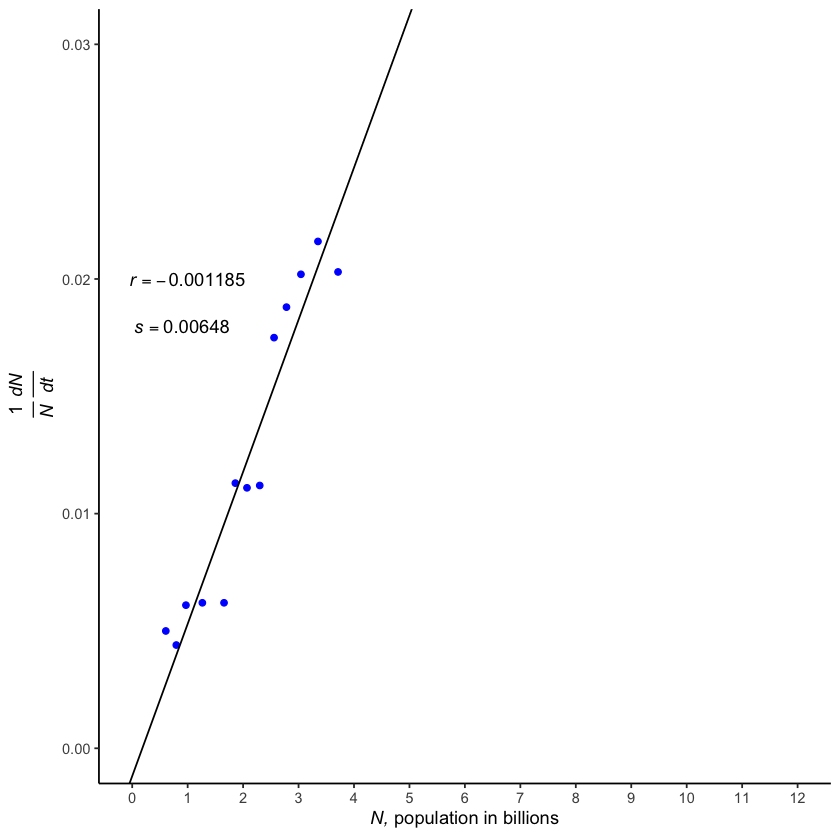

In [3]:
library(ggplot2)
fig_6_2 <- ggplot(data = pop_data[1:13 ,], # subset rows 1:13 of the data.frame
       aes(x = N_billions,                 # N_billions in the X-axis
           y = `1/N deltaN/deltat`)) +     # 1/N deltaN/deltat in the Y-axis
  geom_point(color='blue') +               # change colour of the points
  theme_classic() +                        # set theme of the plot to classic
  scale_x_continuous(name = expression(paste(italic("N,"), " population in billions")), # Name axis with italics text (using expression())
                     breaks = seq(0, 12, by = 1),  # ticks by 1 
                     limits = c(0, 12)) +          # limit x-axis from 0 to 12
  scale_y_continuous(name = expression(paste(frac(1, italic("N")), " ", frac(italic("dN"), italic("dt")))),
                     breaks = seq(0, .03, by = 0.01),
                     limits = c(0, 0.03)) +
  geom_abline(slope = 0.00648, intercept = -0.001185 ) + # plot line with slope and intercept 
  annotate("text", x = 1, y = 0.02, label = expression(italic("r") == -0.001185)) + # annotate value of r (sleope)
  annotate("text", x = 0.9, y = 0.018, label = expression(italic("s") == 0.00648))  # annotate value of s (intercept)

fig_6_2

From the late 1600s to the mid 1960s, then, it's clear that
the birth rate per family was increasing as the population increased. Greater population was enhancing the population's
growth. Such growth is orthologistic, meaning that the human population has been heading for a singularity for many centuries. The singularity is not a modern phenomenon, and could conceivably have been known before the 20th century.

The negative value of $r$, if it is real, means there is a
human Allee point. If the population were to drop below
the level of the intersection with the horizontal axis - in this
projection, around two hundred million people|the human
growth rate would be negative and human populations would
decline. The Allee point demonstrates our reliance on a
modern society; it suggests that we couldn't survive with
our modern systems at low population levels - although perhaps if we went back to hunter-gatherer lifestyles, this would
change the growth curve. The Allee point thus indicates that
there is a minimum human population we must sustain to
avoid extinction. We depend on each other.

## 6.3 A global transition

```{figure} ../img/fig_6_3.png
---
name: figure-6_3
alt: figure-6_3
width: 600px
align: center
---
Continuation of Figure 6.2 to the present day.
```

In Figure [6.3](figure-6_3) we add data from the mid-1960s to the present
day. People living in the 1960s were completely unaware of
the great demographic transition that was developing. For
hundreds of years prior to this time, human populations were
stuck on an orthologistic path, with a singularity ever looming and guaranteed by the positive slope. In most of the world, however, the slope abruptly turned about and negative. Not all countries of the world turned about, but on 
average the world did. Humanity started down a logistic-like
path.

### Code to generate figure 6.3
Figure 6.3 includes the full data frame and additional best fit line. We can [modify the code for figure 2](code_cell_fig_2) as follow.

Warning message:
“Removed 1 rows containing missing values (geom_point).”


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


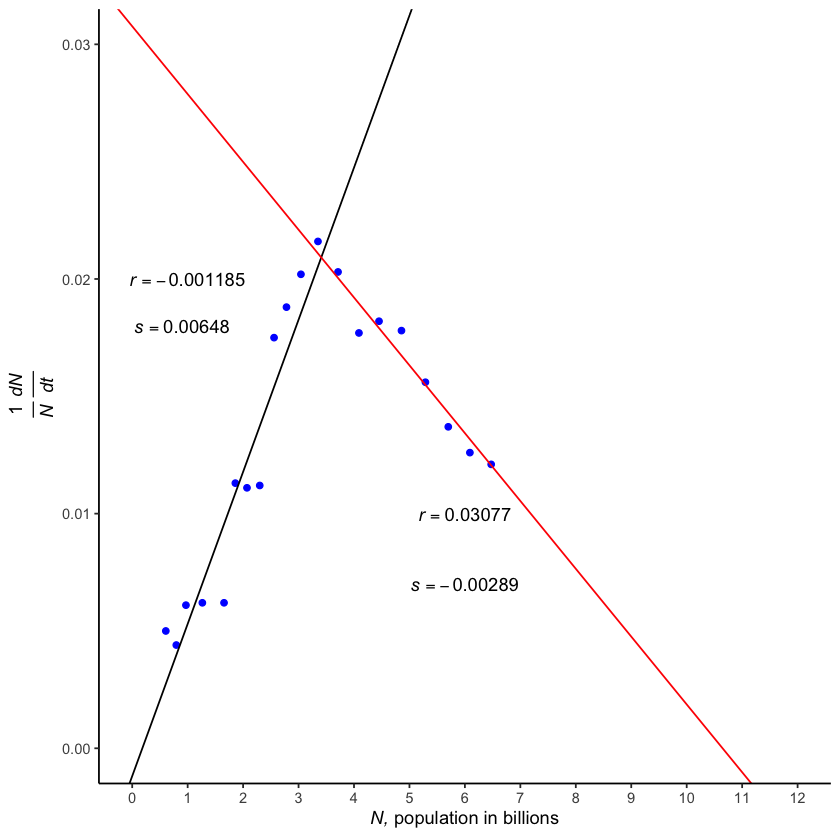

In [4]:
fig_6_3 <- ggplot(data = pop_data, # data frame not subset
                  aes(x = N_billions, 
                      y = `1/N deltaN/deltat`)) +
  geom_point(color='blue') + theme_classic() +
  scale_x_continuous(name = expression(paste(italic("N,"), " population in billions")),
                     breaks = seq(0, 12),
                     limits = c(0, 12)) +
  scale_y_continuous(name = expression(paste(frac(1, italic("N")), " ", frac(italic("dN"), italic("dt")))),
                     breaks = seq(0, .03, by = 0.01),
                     limits = c(0, 0.03)) +
  geom_abline(slope = 0.00648, intercept = -0.001185 ) +
  annotate("text", x = 1, y = 0.02, label = expression(italic("r") == -0.001185)) + 
  annotate("text", x = 0.9, y = 0.018, label = expression(italic("s") == 0.00648)) +
  geom_abline(slope = -0.00289, intercept = 0.03077, colour = "red" ) +             # the second down-slope best fit line
  annotate("text", x = 6, y = 0.01, label = expression(italic("r") == 0.03077)) + 
  annotate("text", x = 6, y = 0.007, label = expression(italic("s") == -0.00289))

fig_6_3

Where the downward-sloping line crosses the horizontal
axis is where population growth would cease. From this simple $r$ + $sN$ model, it appears that world's population will
stabilize between 10 and 12 billion. That is in line with other
recently published projections.

Prior to the 1960s there were dips in the increasing growth,
with World Wars I and II levelling the rate of increase worldwide, though population continued to grow rapidly. The rate 
also fell in 1960, corresponding to extreme social disruptions
in China.

What caused this great demographic transition, averaged
over the globe? The ["Four Horsemen"](https://www.dictionary.com/browse/four--horsemen) (conquest, war, famine, and plague) commonly expected
to check human populations were not a primary cause. In
many regions birth control, became more available. Education slowed reproduction because people got married later.
Modern medicine raised survival rates, making large families unnecessary. The space program looked back at Earth and projected a fragile dot suspended in the black of space, viewed by billions. China's one-child policy had a noticeable
effect. However, so did HIV, one of the few Horsemen that
has made a noticeable comeback.

```{figure} ../img/fig_6_4.png
---
name: figure-6_4
alt: figure-6_4
width: 600px
align: center
---
Human fecundity as a function of national per capita
income.
```

Plants and other animals have logistic growth forced upon
them because of overcrowding. In humans, however, logistic
growth has been largely voluntary. And there could be further developments in a lifetime. In many nations, birth rates are presently below replacement rates. In fact, in all nations with a gross national income above 16K dollars per person, the birth rate is at or below the replacement rate of 2.1 life-time births per female (Figure [6.4](figure_6-4)).

This change in demographic rates could conceivably allow
present and future generations to voluntarily adjust the population to whatever is desired. The new question just may be: what is the minimum world population we dare have?

Returning to your supervisor's questions, you can now
tell her that, in 2100, the world's population will be between
10 and 12 billion. And you can say "The other population
projections are not far off. They are slightly different from
what we calculate using this method. But they use very
complicated methods so you have to cut them a little slack!"